# Examples of non-standard libraries

There are many popular libraries which are not part of the default Python installation. You learned how to find and
install them in the previous unit. Now a few libraries are presented. Note that this unit will not give 
a complete introduction in any of these libraries. Instead the goal of this unit is to give an overview 
of the large variety of available libraries. 


## [requests](https://docs.python-requests.org/en/latest/) - HTTP for Humans

Using the `requests` library, you can connect to web servers and fetch their content.
The [Quickstart Guide](https://docs.python-requests.org/en/latest/user/quickstart/)
contains examples on how to use it and what you can do with it.

In [2]:
import requests

r = requests.get("https://en.wikipedia.org/wiki/Python_(programming_language)")
print(
    f"The word 'Python' is used {r.text.count('Python')} times in its Wikipedia entry!"
)

The word 'Python' is used 1650 times in its Wikipedia entry!


## [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) - Analyzing Webpages

BeautifulSoup is a library which perfectly complements requests, the library just introduced. Whereas requests offers the possibility to download webpages, BeautifulSoup supports the analysis of these webpages. (Actually, the name *BeautifulSoup* goes back to syntactically incorrect webpages containing just a "soup of tags"). 

In the following cell, the web-page from [The Guardian](https://www.theguardian.com) is first downloaded with `request.get()`. The content is then analyzed using `BeautifulSoup()`. With the help of the method `.find_all()` all headings of type `h3` are then listed and printed out.

In [6]:
import requests
from bs4 import BeautifulSoup

r = requests.get("http://www.theguardian.com")
soup = BeautifulSoup(r.text)

for title in soup.find_all("h3"):
    print(title.text)

TariffsTrump maintains hard line on Canada after meeting with Trudeau
AdministrationJared Kushner’s father picked as ambassador to France
Elon MuskBillionaire could use ‘Department of Government Efficiency’ for self-enrichment
HouseMinority leader asks for ‘maximum protection’ after bomb threats target Democrats
SyriaMilitants reach central Aleppo as government forces appear to retreat
Trump administrationDefense secretary nominee Pete Hegseth’s mother called him ‘an abuser of women’
Lebanon‘We will fix our homes’: clean-up begins as Lebanon faces uncertain future
Middle EastIsrael kills charity worker in Gaza, saying he was Hamas militant
IrelandFianna Fáil and Fine Gael in pole position to form new government
PFASStudy links higher PFAS levels to ‘superfund’ sites and limited fresh-food access
GeorgiaPresident calls government illegitimate, claiming rigged election
VirginiaInmates burn themselves in protest at ‘inhumane’ prison conditions
CrimeAfter 50 years of mystery, siblings clai

## [tkinter](https://docs.python.org/3/library/tkinter.html) - Python interface to Tcl/Tk

With `tkinter` you can create a graphical user interface (*GUI*) to extend your program. The
[documentation](https://tkdocs.com/index.html) offers a detailed description how to start and how to use it. In the
example below, a very basic program is shown to create a window containing a text and a button to close it.

In [7]:
from tkinter import *
 
window = Tk()
window.title("GUI created with tkinter")
window.geometry("400x300")

def function_button_1():
    print("Button was pressed")
    
def function_button_2():
    window.destroy()

btn_1 = Button(window, 
             text="This is a Button", 
             background = "yellow", 
             command = function_button_1)
btn_1.grid(column=0, row=1)

btn_2 = Button(window, 
             text="Quit", 
             background = "red", 
             command = function_button_2)
btn_2.grid(column=1, row=1)
             
window.mainloop()

Button was pressed
Button was pressed
Button was pressed
Button was pressed


## Working with large data sets

### [Pandas](https://pandas.pydata.org/) - Python Data Analysis Library

The Python module `pandas` can be used to process data sets, which size is only limited by the memory of your computer.
It provides methods and functions to analyze and visualize these data sets. 

In the next cells, you can see some brief basic usage examples how to use `pandas`. The data used in this example
contains angular rate and acceleration measurements from an IMU *(Intertial Measuremnt Unit)* which 
was sampled with 1 kHz (1.000 measurements per second).

With `head(`*`x`*`)` and `tail(`*`x`*`)`, you can return the first/last *x* lines of your data.

In [12]:
import pandas as pd

dataframe = pd.read_csv("gyro_accel.csv", sep=";")

print(dataframe.info())

print(dataframe.head(2))

FileNotFoundError: [Errno 2] No such file or directory: 'gyro_accel.csv'

Or you can just select and print one specific column of your data:

In [10]:
print(dataframe["Z_ACCL (32 bit)"])

NameError: name 'dataframe' is not defined

You could calculate the mean value of your columns iterating through your data yourself, but with `pandas`, this takes
just one function call:

In [ ]:
mean_values = dataframe.mean()
print(mean_values)

## [Matplotlib](https://matplotlib.org/) - Visualization with Python

With `matplotlib` you can create graphs to visualize your data. It works seamlessly with `pandas`
and is set as a default library for plotting graphs in pandas. Have a look at the next cell to see an example visualizing
the angular rate with a dashed line indicating the mean value.

In [13]:
import matplotlib.pyplot as plt

# set plot size for good visibility
plt.figure(figsize=(12, 6))

dataframe["Z_GYRO (32 bit)"].plot(color="blue")

# plot mean line for z_gyro values and show plot
plt.axhline(y=mean_values[2], color="red", linewidth=2, linestyle="--")
plt.show()

NameError: name 'dataframe' is not defined

<Figure size 1200x600 with 0 Axes>

Of course, it is also possible to use `matplotlib` directly. in the following cell a large number of normally 
distribute values are generated. These values are then displayed using a histogram.

[118.18002592123776, 115.55218603372019, 82.5347570843009, 84.48842621026014, 129.8333667009476, 85.7428913773447, 104.6258839307527, 107.12847963851702, 95.06764269941971, 97.61705807858188]


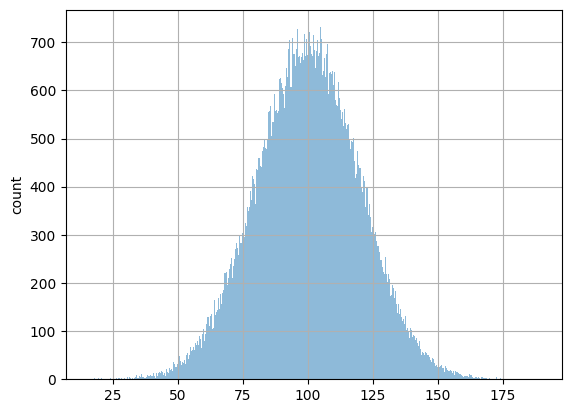

In [14]:
import random
import matplotlib.pyplot as plt

random_values = []
for _ in range(100000):
    random_values.append(random.gauss(mu=100, sigma=20))

print(random_values[:10])

plt.hist(random_values, bins=500, alpha=0.5)
plt.ylabel("count")
plt.grid(True)